# Time Series Final Project

This report is based on the excel spreadsheet named "data_exam.xlsx". 

*Authors: Sarra Ben Yahia & José Ángel García Sánchez*

### 1. Explain the concept behind each column. What are these time series meant to represent? Transform these time series so that they are comparable in scale and order. 

#### Introduction
In this report, we will analyze the joint relationship between three time series: parkinson and VIX estimators with squared returns. To better understand this relationship, we will convert all series to annual variances, as variances are closely linked to squared returns. In contrast, volatilities have a natural relationship with absolute returns.

#### Why Use Parkinson and VIX Estimators to Explain Squared Returns?
The estimated historical volatility $\sigma$ of squared returns only captures linear relationships and assumes all events are equally weighted. In financial markets, volatility estimates based on a small dataset might lead to noisy measurements of the estimator due to sampling errors. Conversely, a large dataset uses information that is no longer relevant to the present state of the market. Therefore, using historical volatility as an exact number may not represent the actual value.  

To address this problem, alternative volatility estimators that use all data points other than closing prices, such as Close-to-Close, Garman and Klass (GK), Parkinson’s, Rogers and Satchell (RS), and Garman and Klass–Yang and Zhang (GK-YZ), can be used. In this report, we will focus on Parkinson and VIX estimators, they are widely used and provide a good balance between accuracy and computational efficiency. 

The Parkinson estimator is based on the high and low prices, while the VIX estimator is based on the implied volatilities of S&P 500 index options. By comparing their performance in explaining squared returns, we can gain insights into the joint relationship between these time series.  

#### Parkinson estimator
The Parkinson estimator is widely used to transform squared returns from a daily to an intraday frequency. As we learned in class, having intraday series can be extremely expensive, often costing up to 10k€ per series. Thus, a good approach is to use the Parkinson estimator to approximate intraday returns and obtain a well-explained variability of returns.  

The Parkinson estimator is a simplified version of the Garman Klass method, which includes a time component between the opening and closing prices. However, the Parkinson estimator is known for its high volatility, which can make it difficult to distinguish the signal from the noise. To overcome this issue, it is necessary to filter out the white noise from the information provided by the estimator. The Parkinson estimator is based on the high and low prices of a financial instrument and can be expressed as follows:  

$$\sigma_{Parkinson} = \sqrt{\frac{1}{4n\ln2}\sum_{k=1}^n\left(\log\left(\frac{H_{k}}{L_{k}}\right)\right)^2}$$

#### Extension of parkinson estimator
Even if the Parkinson estimate of variance is unbiased for continuous prices, prices are only sampled discretely. Then another approach or extension to using the Parkinson estimator could be to consider more accurate volatility estimators. According to [volatilites mesures article](https://www.mdpi.com/1099-4300/24/10/1410), while the Parkinson estimator is five times more efficient than the close-to-close estimator, the Garman Klass method is 7.4 times more efficient than close-to-close. Garman-Klass estimator (GK) is given by:  

$$\sigma_{GK} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\frac{1}{2}\left(\frac{\Delta H_i}{C_i} - \frac{\Delta L_i}{C_i}\right)^2 - (2\ln2 - 1)\left(\frac{\Delta C_i}{C_i}\right)^2\right)}$$

Moreover, an even more recent and improved version of the Garman Klass method is the Yang and Zhang developed version of GK (YZ-GK estimator), which provides even better accuracy and efficiency. The estimator is given by:  

$$\sigma_{YZ-GK} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\alpha\left(\frac{\Delta H_i}{C_i}\right)^2 + (1-\alpha)\left(\frac{\Delta C_i}{C_i}\right)^2 - 2\beta\left(\frac{\Delta H_i}{C_i}\right)\left(\frac{\Delta C_i}{C_i}\right)\right)}$$

#### Parkison transformation
To annualize the Parkinson variance, we can multiply the daily variance by 252, since there are 252 trading days in a year. This transformation is given by the following formula:

$$\sigma_{Annualised\ Parkinson}^2 = \sigma_{Daily\ Parkinson}^2 * 252$$

#### VIX
The VIX (CBOE Volatility Index) is a measure of the expected 30-day volatility of the U.S. stock market, derived from the prices of S&P 500 index options. It represents the market's expectation of near-term volatility. In our case VIX is expressed as percentage points.  
  
#### VIX transformations  
To yield volatility from percentage value we do:

$$\sigma_{VIX} = \frac{VIX\ Value}{100}$$

then to have annualised variance we do:
$$\sigma_{Annualised\ VIX}^2 = \sigma_{VIX}*\left(\sqrt{\frac{252}{30}}\right)^2$$



In [29]:
import numpy as np
import pandas as pd

df = pd.read_excel("./data_exam.xlsx", index_col=0)
print(df)


              VIX  Parkinson  Squared returns
2000-01-04  27.01   0.001406         0.000612
2000-01-05  26.41   0.000002         0.000326
2000-01-06  25.73   0.000045         0.000169
2000-01-07  21.72   0.001577         0.000723
2000-01-10  21.71   0.000109         0.000111
...           ...        ...              ...
2023-02-08  19.63   0.000117         0.000070
2023-02-09  20.71   0.000088         0.000179
2023-02-10  20.53   0.000004         0.000041
2023-02-13  20.34   0.000134         0.000110
2023-02-14  18.94   0.000019         0.000110

[5822 rows x 3 columns]


In [323]:
df['VIX_annualised_variance'] = ((df['VIX'] / 100) * np.sqrt(252/30))**2
df['parkinson_annualised_variance'] = df['Parkinson'] * 252
df['squared_returns_annualised'] = df['Squared returns'] * 252


In [324]:
df.describe()


,VIX,Parkinson,Squared returns,VIX_annualised_variance,parkinson_annualised_variance,squared_returns_annualised,log_squared_returns_annualised,log_squared_returns,first_difference_squared_returns_annualised,first_difference_squared_returns,sqrt_returns_annualised_logdiff
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5821.000000,5.821000e+03,5821.000000
mean,20.191311,0.000156,0.000145,0.405662,0.039319,0.036665,-4.153202,-9.682631,-0.000022,-8.614672e-08,-0.000295
std,8.674953,0.000575,0.000342,0.451209,0.144904,0.086154,1.226934,1.226934,0.068631,2.723453e-04,0.997741
min,9.140000,0.000000,0.000001,0.070173,0.000000,0.000363,-7.922366,-13.451795,-1.220028,-4.841381e-03,-3.939126
25%,13.970000,0.000005,0.000026,0.163935,0.001226,0.006558,-5.027075,-10.556504,-0.010045,-3.985972e-05,-0.693003
50%,18.230000,0.000030,0.000061,0.279160,0.007538,0.015306,-4.179500,-9.708929,0.000093,3.672228e-07,0.007223
75%,23.930000,0.000120,0.000138,0.481022,0.030309,0.034871,-3.356104,-8.885533,0.009777,3.879742e-05,0.687205
max,82.690000,0.019919,0.006161,5.743614,5.019508,1.552486,0.439857,-5.089572,1.146395,4.549185e-03,3.527933


<Axes: >

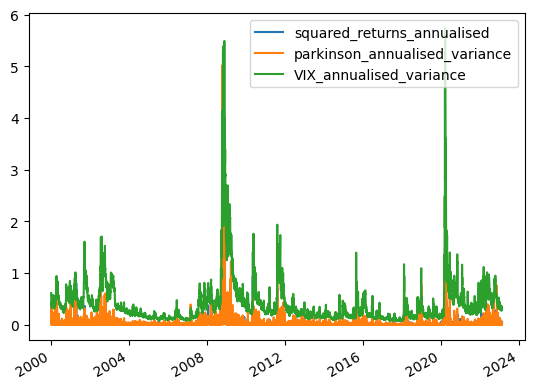

In [325]:
# before standard scaling
df[['squared_returns_annualised', 'parkinson_annualised_variance',
    'VIX_annualised_variance']].plot()


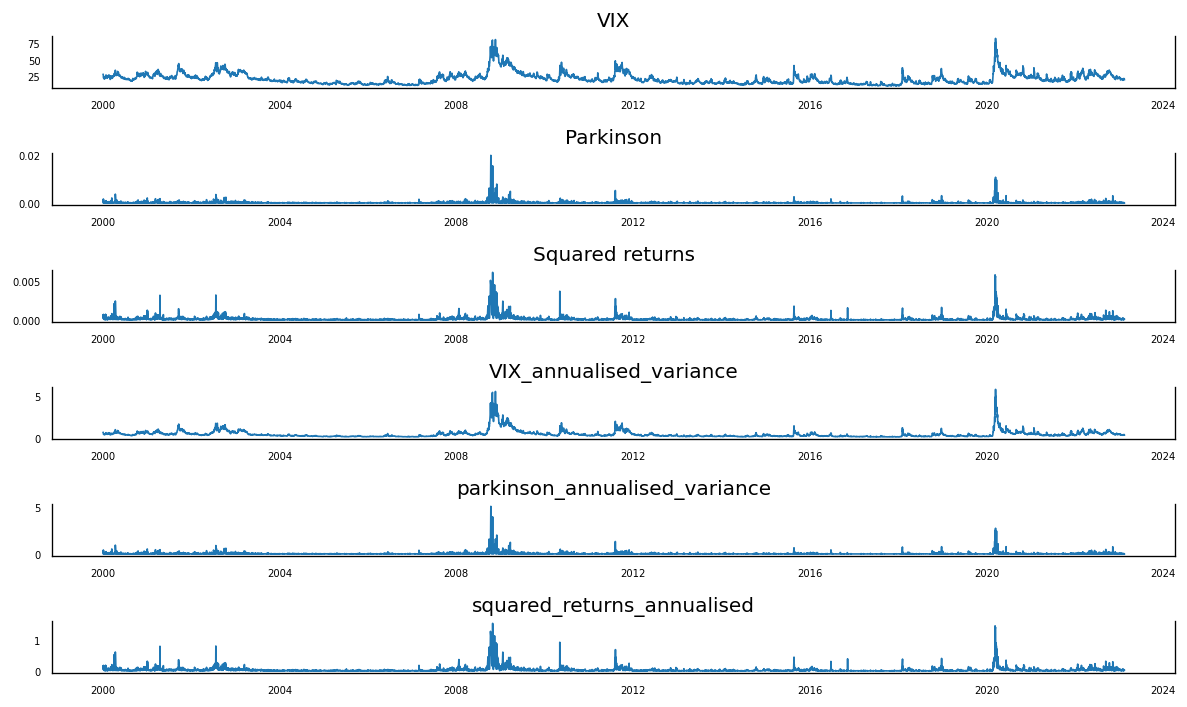

In [326]:
import matplotlib.pyplot as plt
# Visualizing each series

fig, axes = plt.subplots(nrows=6, ncols=1, dpi=120, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(df.index, data, linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)
    plt.tight_layout()


<Axes: >

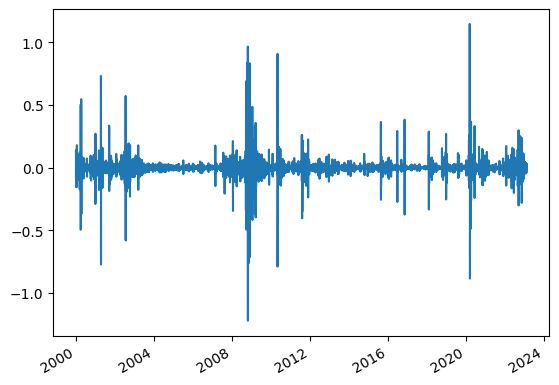

In [329]:
df["sqrt_returns_annualised_logdiff"]=df["squared_returns_annualised"].diff()
df["sqrt_returns_annualised_logdiff"].plot()

<Axes: >

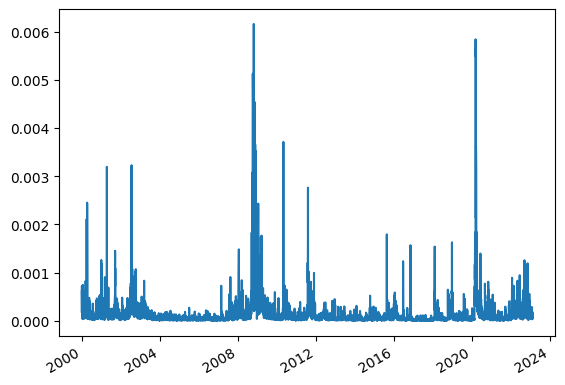

In [330]:
df["Squared returns"].plot()

### 2. Estimate and AR model on each of these time series. Determine the order of the AR process and show the estimates. What can you conclude from these estimations?

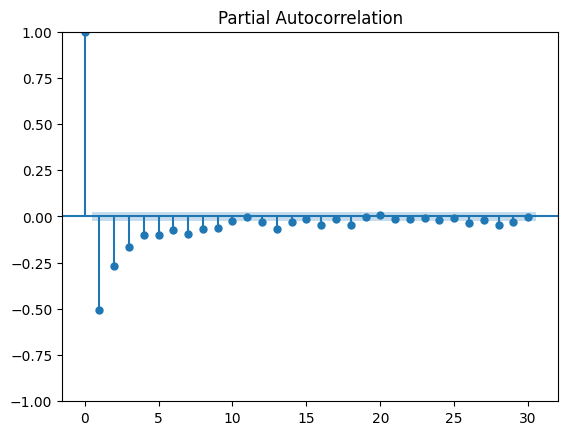

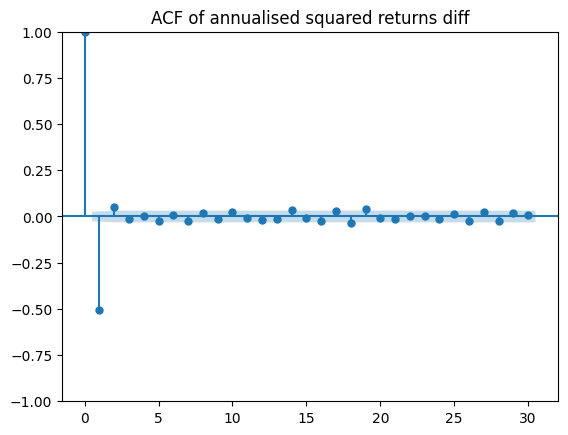

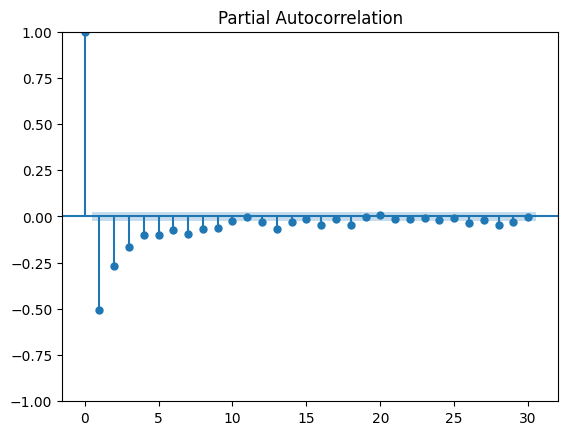

In [322]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['sqrt_returns_annualised_logdiff'].dropna(),lags=30, title="ACF of annualised squared returns diff")
plot_pacf(df['sqrt_returns_annualised_logdiff'].dropna(),lags=30)

#plot_acf(df['Squared returns'].dropna(),lags=30, title="ACF of squared returns")

This autocorrelation function remains positive and decays slowly, remaining significantly positive over weeks.
This characteristic can be formally recognized as the ARCH effects, which were initially noticed by Mandelbrot (1963) in commodity prices. Engle (1982) and Bollerslev (1986) established the autoregressive conditional heteroscedastic (ARCH) models and their expansion to GARCH models, demonstrating that volatility clustering is evident in numerous financial assets, such as stocks, market indexes, exchange rates, and interest rate securities.

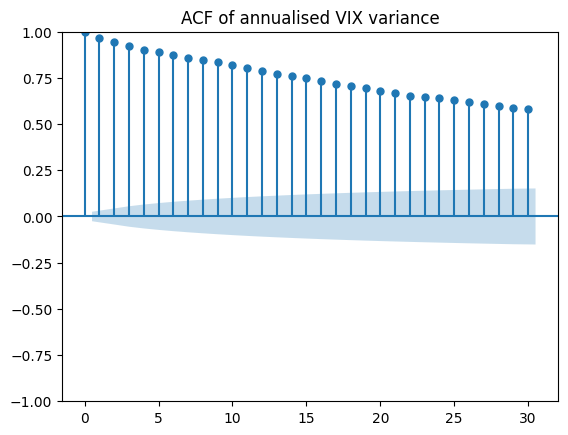

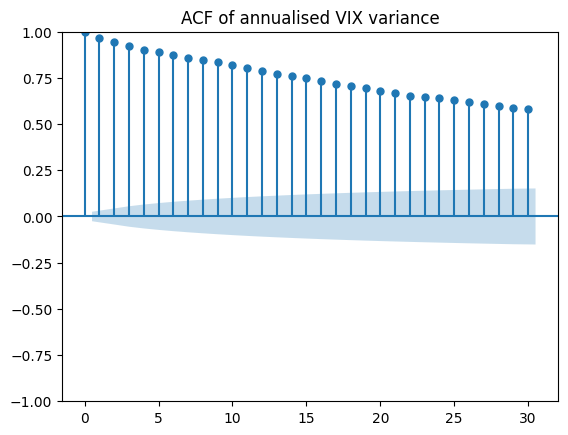

In [231]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['VIX_annualised_variance'].dropna(),lags=30, title="ACF of annualised VIX variance")

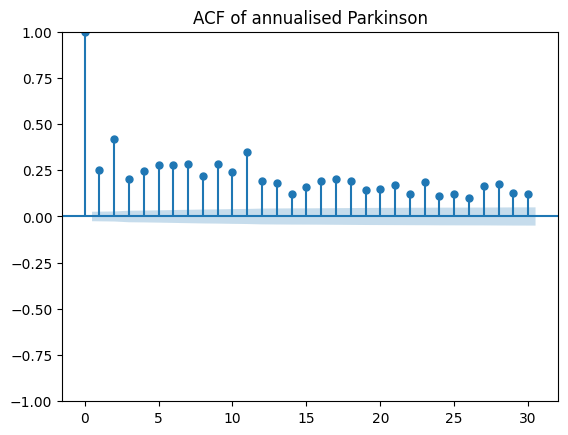

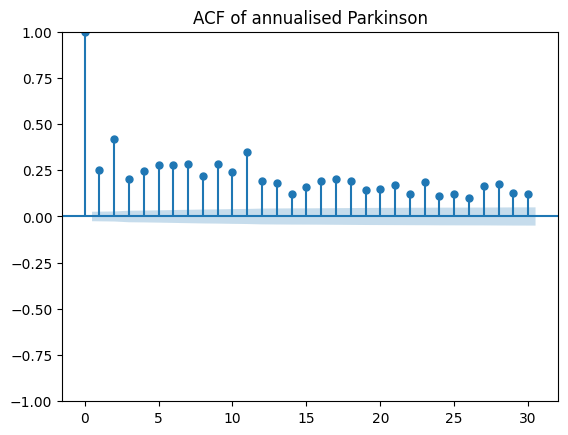

In [215]:
from statsmodels.graphic
plot_acf(df['parkinson_annualised_variance'].dropna(),lags=30, title="ACF of annualised Parkinson")

In [235]:
# Optimization
from scipy.stats import norm
def ML_criterion_ar1(para,x,plot=False):
    phi0=para[0]
    phi1=para[1]
    expected=phi0+phi1*x.iloc[0:-1]
    expected.index=x.index[1:len(x)]
    temp=pd.concat([x,expected],axis=1)
    temp.columns=['initial','fit']
    temp=temp.dropna()
    difference=temp['initial']-temp['fit']
    volatility=np.nanstd(difference)
    loglik=norm.pdf(temp['initial'],temp['fit'],volatility)
    criterion=np.nansum(np.log(loglik))
    if plot==True:
        temp.plot()
    return -criterion

-2159.8995739272764

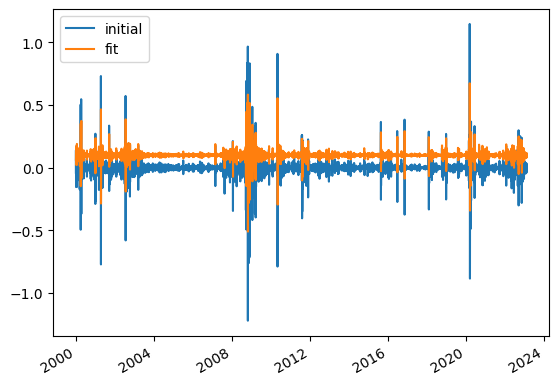

In [246]:
para=[0.1,0.5]
ML_criterion_ar1(para,df['sqrt_returns_annualised_logdiff'],plot=True)

In [267]:
from scipy.optimize import minimize
x0 = np.array([0,1])
res_EV = minimize(ML_criterion_ar1, x0, method='BFGS', args=(df['sqrt_returns_annualised_logdiff']),hess=True,options={'disp': False})

In [268]:
res_EV.x

array([-1.93417725e-05, -4.60838335e-01])

In [269]:
res_EV

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -8029.0213573266465
        x: [-1.934e-05 -4.608e-01]
      nit: 8
      jac: [ 0.000e+00  0.000e+00]
 hess_inv: [[ 6.675e-07  3.420e-08]
            [ 3.420e-08  1.353e-04]]
     nfev: 42
     njev: 14

In [260]:
# Standard deviation of the parameters
std_para=np.diag(res_EV.hess_inv)**.5
# Student test
st = res_EV.x/std_para
print(st)

[-2.36742046e-02 -3.96141541e+01]


## VIX

516.035788860539

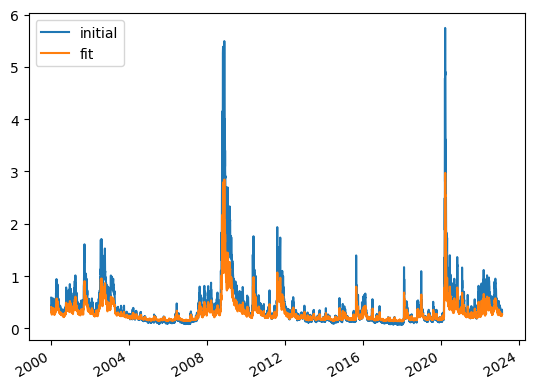

In [314]:
para=[0.1,0.5]
ML_criterion_ar1(para,df['VIX_annualised_variance'],plot=True)

In [300]:
from scipy.optimize import minimize
x0 = np.array([0.1,1])
res_EV = minimize(ML_criterion_ar1, x0, method='BFGS', args=(df['VIX_annualised_variance']),hess=True,options={'disp': False})

In [301]:
res_EV

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -4044.002856844095
        x: [ 1.476e-02  9.635e-01]
      nit: 7
      jac: [ 3.052e-05  3.052e-05]
 hess_inv: [[ 6.845e-06 -1.389e-06]
            [-1.389e-06  1.534e-06]]
     nfev: 51
     njev: 17

In [302]:
# Optimization

def ML_HAR(para,x,plot=False):
    phi0=para[0]
    phi1=para[1]
    phi2=para[2]
    phi3=para[3]
    
    # computing moving averages
    ma5=x.rolling(5).mean().shift(1)
    ma20=x.rolling(20).mean().shift(1)
    ma1=x.shift(1)

    combination=pd.concat([x, ma1, ma5, ma20],axis=1)
    combination=np.log(combination)
    combination=combination.dropna()
    combination.columns=['ini','ma1','ma5','ma20']    
    expected=phi0+phi1*combination['ma1']+phi2*combination['ma5']+phi3*combination['ma20']
    temp=pd.concat([combination['ini'],expected],axis=1)
    error=combination['ini']-expected
    sigma=np.nanstd(error)
    #print(para)
    density=norm.pdf(combination['ini'],expected,sigma)
    criterion=np.nansum(np.log(density))
    if plot==True:
        temp.plot()
    return -criterion

In [309]:
from scipy.optimize import minimize
x0 = np.array([0.1,1,-1,1])
res_EV = minimize(ML_HAR, x0, method='BFGS', args=df["VIX_annualised_variance"],hess=True,options={'disp': False})

In [310]:
res_EV.x

array([-0.01749709,  0.89186295,  0.05346458,  0.04148745])

In [311]:
# Standard deviation of the parameters
std_para=np.diag(res_EV.hess_inv)**.5
# Student test
print(res_EV.x/std_para)

[-4.22572236 59.13323273  2.81631565  4.13691006]


-3169.624754939966

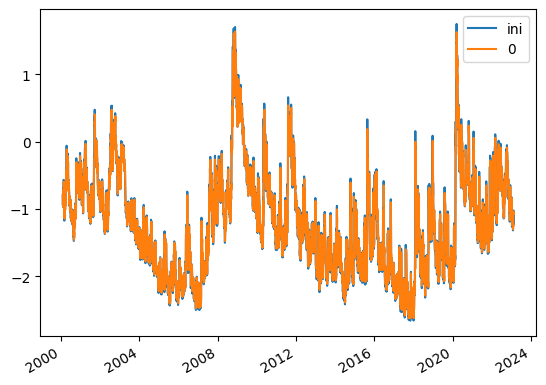

In [312]:
ML_HAR(res_EV.x,df["VIX_annualised_variance"],True)

In [141]:
from statsmodels.tsa.stattools import adfuller, kpss

# Define the columns of interest
cols = ['VIX_annualised_variance',
        'parkinson_annualised_variance', 'squared_returns_annualised']

# Loop through each column and perform the ADF, KPSS
for col in cols:
    print(f'------------Testing column: {col}------------')

    # ADF test
    result_adf = adfuller(df[col])
    print('------------ ADF Statistic: %f' % result_adf[0])
    print('p-value: %f' % result_adf[1])
    for key, value in result_adf[4].items():
        print('Critical Value %s: %.3f' % (key, value))

    # KPSS test
    result_kpss = kpss(df[col])
    print('------------ KPSS Statistic: %f' % result_kpss[0])
    print('p-value: %f' % result_kpss[1])
    for key, value in result_kpss[3].items():
        print('Critical Value %s: %.3f' % (key, value))

    # Check if the time series is stationary or not
    if result_adf[1] < 0.05 and result_kpss[1] > 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is not stationary.")

    print(' ' * 50)


------------Testing column: VIX_annualised_variance------------
------------ ADF Statistic: -6.091627
p-value: 0.000000
Critical Value 1%: -3.431
Critical Value 5%: -2.862
Critical Value 10%: -2.567
------------ KPSS Statistic: 0.383261
p-value: 0.084370
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
The time series is stationary.
                                                  
------------Testing column: parkinson_annualised_variance------------
------------ ADF Statistic: -8.185235
p-value: 0.000000
Critical Value 1%: -3.431
Critical Value 5%: -2.862
Critical Value 10%: -2.567
------------ KPSS Statistic: 0.169003
p-value: 0.100000
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739
The time series is stationary.
                                                  
------------Testing column: squared_returns_annualised------------
------------ ADF Statistic: -8.214812
p-value: 

In [150]:
vix = df['VIX_annualised_variance'].values
parkinson = df['parkinson_annualised_variance'].values
squared_returns = df['squared_returns_annualised'].values


In [206]:
import statsmodels.tsa.api as sm
import warnings
warnings.filterwarnings("ignore")

# function to estimate AR model and return AIC/BIC
def ar_order(y, max_order):
    aic = np.zeros(max_order+1)
    bic = np.zeros(max_order+1)
    for i in range(0, max_order+1):
        ar_model = sm.AutoReg(y, lags=i).fit()
        aic[i] = ar_model.aic
        bic[i] = ar_model.bic
    return aic, bic


# estimate AR model order for each time series
vix_aic, vix_bic = ar_order(vix, 20)
parkinson_aic, parkinson_bic = ar_order(parkinson, 20)
squared_returns_aic, squared_returns_bic = ar_order(squared_returns, 20)

# find the order that minimizes AIC/BIC
vix_order = np.argmin(vix_aic)
parkinson_order = np.argmin(parkinson_aic)
squared_returns_order = np.argmin(squared_returns_aic)

# fit AR model with chosen lag order
vix_ar_model = sm.AutoReg(vix, lags=vix_order).fit()
parkinson_ar_model = sm.AutoReg(parkinson, lags=parkinson_order).fit()
squared_returns_ar_model = sm.AutoReg(
    squared_returns, lags=squared_returns_order).fit()

# print estimated coefficients
print('------------VIX AR({}) model coefficients:------------'.format(vix_order))
print(vix_ar_model.params)
print('\n------------Parkinson AR({}) model coefficients:------------'.format(parkinson_order))
print(parkinson_ar_model.params)
print('\n------------Squared returns AR({}) model coefficients:------------'.format(squared_returns_order))
print(squared_returns_ar_model.params)


------------VIX AR(14) model coefficients:------------
[ 9.84070589e-03  7.38355961e-01  2.08679788e-01  4.08155972e-02
 -1.43889800e-01  1.33266923e-01 -3.19959677e-03 -2.48518550e-02
 -2.06544733e-02  9.63827447e-02 -5.08075984e-04 -2.47165105e-02
 -2.69948879e-02 -4.25039862e-02  4.54680848e-02]

------------Parkinson AR(14) model coefficients:------------
[ 0.00857933  0.06076462  0.31360409 -0.00942176 -0.03239644  0.10034619
  0.1206102   0.08381076 -0.00622923  0.05229222  0.07324112  0.19482157
 -0.0197179  -0.09682756 -0.0543033 ]

------------Squared returns AR(20) model coefficients:------------
[ 0.0039808   0.36222895  0.25514065  0.00059646  0.10793849  0.01387144
  0.05079259  0.04657276  0.01960477  0.06831518 -0.03123867 -0.00475933
  0.07003444 -0.06981527 -0.07010857 -0.00151225  0.03432787  0.00612655
 -0.03096091  0.02725618  0.03608537]


Autoregressive models can be expressed mathematically as follows:

AR(p) model: $Y_t = c + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \dots + \phi_p Y_{t-p} + \epsilon_t$

In this equation, Y_t represents the value of the time series at time t, c is a constant term, phi_1 through phi_p are coefficients that represent the impact of past values on the current value, epsilon_t is the error term, and p is the lag order of the model. The value of p indicates how many past values of the time series are used to predict the current value.

The estimated coefficients of the AR models provide insight into the degree of persistence or memory in the time series.

In the case of the VIX time series, the AR(10) model suggests that the current value of the VIX level is significantly influenced by the previous 10 periods of VIX levels, as well as by the past values of the annualized variance of the VIX. The estimated coefficients of the model indicate that the persistence of volatility is an important characteristic of this time series. This means that when the VIX is high, it is likely to remain high for some time, and when it is low, it is likely to remain low.

Similarly, for the Parkinson estimates, the AR(10) model indicates that the current estimate is influenced by the previous 10 periods of estimates of Parkinson's volatility. This means that if Parkinson's volatility is high or low in the past, it is likely to remain so in the future.

For the squared returns, the AR(9) model shows that past values of squared returns have a significant impact on the current value. This indicates that the squared returns exhibit some degree of persistence or memory, meaning that current values are influenced by past values.

These findings are important because they can be used to build more accurate models for forecasting future values of the time series, as well as for identifying patterns and trends in the data. Additionally, the persistence of volatility and other characteristics of these time series may have important implications for financial decision-making and risk management.

In [207]:
import matplotlib.pyplot as plt

# generate predicted values based on AR models
vix_ar_pred = vix_ar_model.predict()
parkinson_ar_pred = parkinson_ar_model.predict()
squared_returns_ar_pred = squared_returns_ar_model.predict()


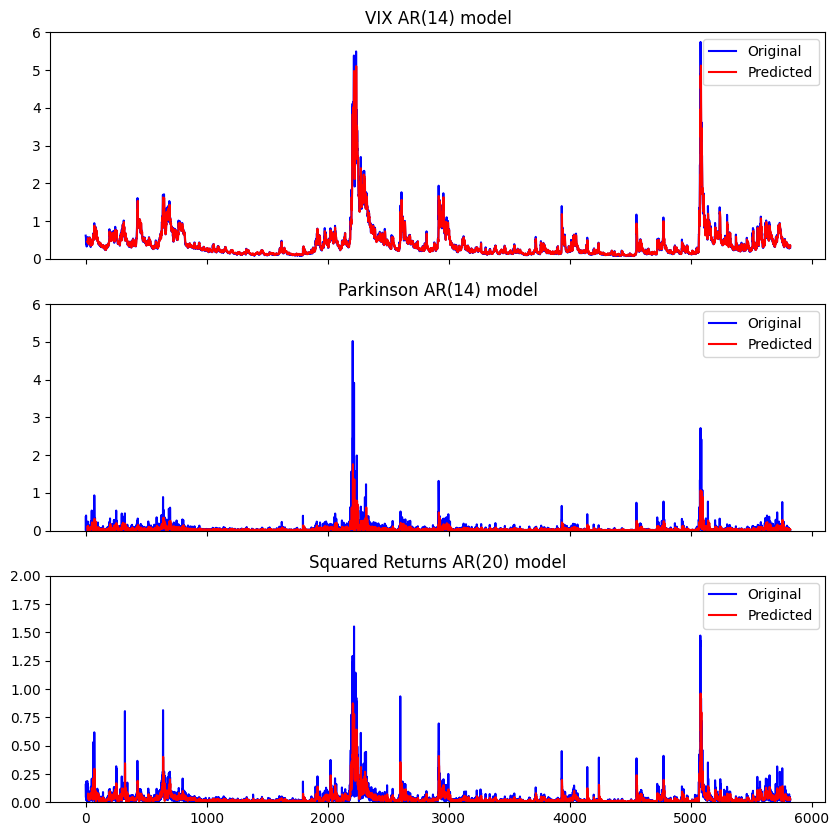

In [208]:
# plot original time series and fitted values
fig, axes = plt.subplots(3, 1, figsize=(10,10))

#VIX series
axes[0].plot(vix, color='blue', label='Original')
axes[0].plot(vix_ar_pred, color='red', label='Predicted')
axes[0].set_title('VIX series')
axes[0].set_title('VIX AR({}) model'.format(vix_order))
axes[0].set_ylim([0,6])
axes[0].set_ylim([0,6])
axes[0].set_xticklabels([])
axes[0].set_xticklabels([])
axes[0].legend()
axes[0].legend()

#Parkinson series
axes[1].plot(parkinson, color='blue', label='Original')
axes[1].plot(parkinson_ar_pred, color='red', label='Predicted')
axes[1].set_title('Parkinson series')
axes[1].set_title('Parkinson AR({}) model'.format(parkinson_order))
axes[1].set_ylim([0,6])
axes[1].set_ylim([0,6])
axes[1].set_xticklabels([])
axes[1].set_xticklabels([])
axes[1].legend()
axes[1].legend()

#Squared returns series
axes[2].plot(squared_returns, color='blue', label='Original')
axes[2].plot(squared_returns_ar_pred, color='red', label='Predicted')
axes[2].set_title('Squared Returns series')
axes[2].set_title('Squared Returns AR({}) model'.format(squared_returns_order))
axes[2].set_ylim([0,2])
axes[2].set_ylim([0,2])
axes[2].legend()
axes[2].legend()

plt.show()


### **Description of the columns**

----

**Column B:**   
The VIX is a measure of market volatility often referred to as the "fear index." The VIX level represents the level of expected volatility in the S&P 500 index over the next 30 days. The VIX level is calculated based on the prices of options contracts on the S&P 500 index.

A higher VIX level indicates greater expected volatility, while a lower VIX level suggests a lower level of expected volatility. Generally, when the stock market experiences significant price fluctuations, the VIX level tends to increase, as investors become more uncertain and demand higher premiums for options contracts to hedge their positions. Conversely, when the market is relatively stable, the VIX level tends to be lower.

----

**Column C:**
The parkison estimates refers to the parkinson law formula (1980) used to estimate the volatility of stock prices.

Parkinson's law calculates the daily volatility of a stock by using the high and low prices of the day. The formula is as follows:

Parkinson's volatility estimate = (High price - Low price) / sqrt(2 * closing price)

Where:

- High price: the highest price of the stock during the day
- Low price: the lowest price of the stock during the day
- Closing price: the closing price of the stock for the day

The result of the formula represents the estimated standard deviation of the stock's daily returns. Parkinson's law is considered one of the simplest ways to estimate volatility, although it has some limitations and may not always accurately reflect the true volatility of a stock.

----

**Columns D:**
Squared returns are a measure of the volatility of an asset, such as a stock or a portfolio of stocks. They are obtained by squaring the daily returns of the asset.  

Daily returns are the percentage change in the price of an asset from one day to the next. Squaring the daily returns helps to emphasize large changes in the asset's price, as large returns are amplified when they are squared. The resulting squared returns can be summed over a period of time to give an estimate of the asset's volatility over that period.  

Squared returns are often used in financial modeling and risk management to estimate the volatility of an asset or portfolio of assets, which is an important measure of risk. Higher volatility means greater uncertainty and potential for larger price swings, while lower volatility suggests a more stable asset with smaller price fluctuations.  


---

###### Q2

In [82]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the ACF and PACF for each time series
for col in volatility_changes_scaled.columns:
    plot_acf(volatility_changes_scaled[col], lags=300, title=col+" ACF")
    plot_pacf(volatility_changes_scaled[col], lags=300, title=col+" PACF")

    # Estimate AR models of different orders based on the ACF and PACF
    # print(f"AR model for column {col}:")
    # for order in range(1, 6):
    #     # Fit the AR model of the specified order
    #     model = sm.tsa.ar_model.AutoReg(volatility_changes_scaled[col], lags=order, trend='c')
    #     results = model.fit(maxlag=order, trend='c')

    #     # Print the order, AIC value, and parameter estimates
    #     print(f"Order {order}: AIC={results.aic:.2f}")
    #     print(results.params)
    # print()


NameError: name 'volatility_changes_scaled' is not defined